In [1]:
setwd("data/")

In [2]:
exam_data <- "teste.csv"
open_file  <- file(exam_data, open = "r")
linecount <- 0
string_data <- ""
while (length(single_line <- readLines(open_file, n = 1, warn = FALSE)) > 0) {
  linecount <- linecount + 1
  if (linecount < 3) {
    exam_data <- paste0(exam_data,single_line)     
  }
  #Typical Google Analytics CSV outputs have the column headings in row 5
  if (linecount == 5) column_headings = strsplit(single_line, ",")[[1]]
  #We do not need the first 5 lines in the CSV
  if (linecount > 5) {
        #Typical Google Analytics CSV outputs have a blank row after the first data set
    if (gsub(pattern=",", x=single_line, replacement="") == "") break
        string_data <- paste0(string_data,single_line,"\n")
  }
}
close(open_file)
exam_table <- read.table(textConnection(string_data), sep=",", header=FALSE, stringsAsFactors = FALSE)
#Assigning the column headings to our data table
names(exam_table) <- column_headings

In [3]:
column_headings

[1] "Week"     "big data" "hadoop"

In [4]:
exam_table$WeekID<-seq.int(nrow(exam_table))

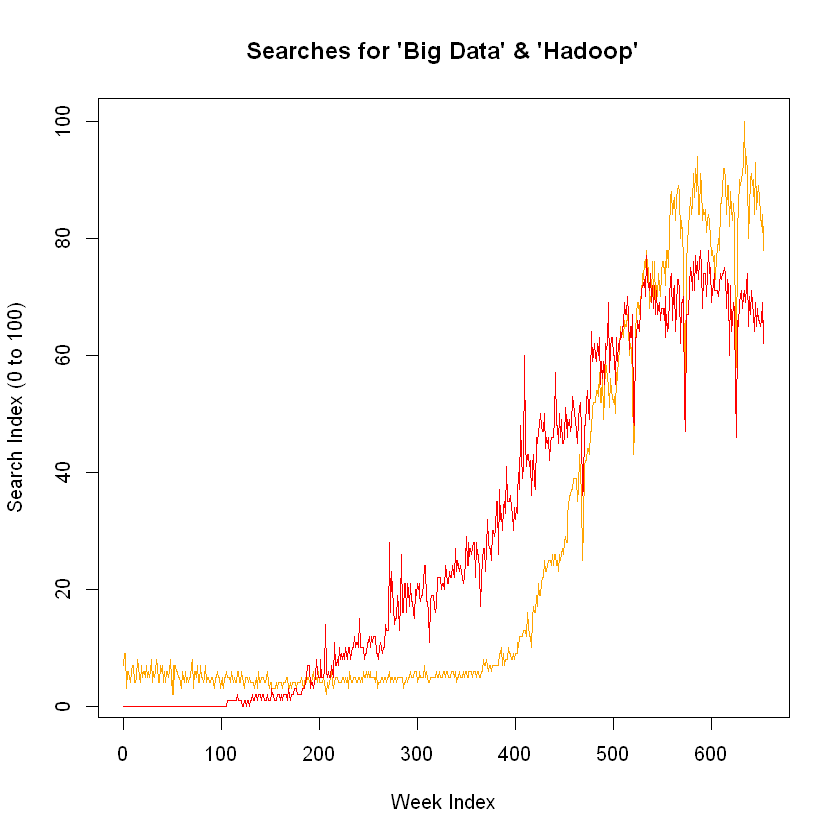

In [5]:
par(mfrow = c(1, 1))
plot(exam_table$WeekID, exam_table$'big data', 
     main = "Searches for 'Big Data' & 'Hadoop'",
     ylab = "Search Index (0 to 100)",
     xlab = "Week Index",
     type = 'l',
     col  = 'orange')
lines(exam_table$WeekID, exam_table$hadoop, type = 'l', col = 'red')

In [6]:
cor(exam_table$'big data',exam_table$hadoop)

[1] 0.9126118

In [8]:
summary(exam_table)

     Week              big data          hadoop          WeekID     
 Length:654         Min.   :  2.00   Min.   : 0.00   Min.   :  1.0  
 Class :character   1st Qu.:  5.00   1st Qu.: 2.00   1st Qu.:164.2  
 Mode  :character   Median :  6.00   Median :22.00   Median :327.5  
                    Mean   : 26.34   Mean   :29.59   Mean   :327.5  
                    3rd Qu.: 52.75   3rd Qu.:59.00   3rd Qu.:490.8  
                    Max.   :100.00   Max.   :78.00   Max.   :654.0  

In [9]:
Regression <- lm (formula = exam_table$'big data' ~ exam_table$hadoop) 

In [10]:
Regression


Call:
lm(formula = exam_table$"big data" ~ exam_table$hadoop)

Coefficients:
      (Intercept)  exam_table$hadoop  
           -4.601              1.046  


In [11]:
round(coef(Regression), digits = 2)

(Intercept) exam_table$hadoop 
            -4.60              1.05

In [12]:
summary(Regressão)$r.squared

ERROR: Error in summary(Regressão): objeto 'Regressão' não encontrado


In [14]:
round(summary(Regression)$adj.r.squared)


[1] 1